<a href="https://colab.research.google.com/github/Emjeeey/ITBA-3205_HumanTraffickingINDIA/blob/main/404_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Emjeeey/ITBA-3205_ImpactClimateChange.git


Cloning into 'ITBA-3205_ImpactClimateChange'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 302 (delta 83), reused 88 (delta 46), pack-reused 140
Receiving objects: 100% (302/302), 6.77 MiB | 18.53 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib==3.1.3

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#understanding the data

In [ ]:
data = '/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/2019_victims_trafficked.xlsx'
VictimsTrafficked2019 = pd.read_excel(data)


In [ ]:
VictimsTrafficked2019.info()

In [ ]:
VictimsTrafficked2019.describe()

In [ ]:
VictimsTrafficked2019.head()

,State/UT,Male,Female,Total_victims_trafficked,Age Group,region type
0,Andhra Pradesh,0,18,18,Below 18,state
1,Arunachal Pradesh,1,3,4,Below 18,state
2,Assam,24,56,80,Below 18,state
3,Bihar,261,33,294,Below 18,state
4,Chhattisgarh,52,61,113,Below 18,state


In [ ]:
VictimsTrafficked2019.tail()

,State/UT,Male,Female,Total_victims_trafficked,Age Group,region type
67,D&N Haveli,0,0,0,Above 18,union territory
68,Daman & Diu,0,0,0,Above 18,union territory
69,Delhi UT,42,30,72,Above 18,union territory
70,Lakshadweep,0,0,0,Above 18,union territory
71,Puducherry,0,5,5,Above 18,union territory


In [ ]:
VictimsTrafficked2019.shape

In [ ]:
VictimsTrafficked2019.columns

In [ ]:
VictimsTrafficked2019.nunique()

In [ ]:
VictimsTrafficked2019.isnull().sum()

State/UT                    0
Male                        0
Female                      0
Total_victims_trafficked    0
Age Group                   0
region type                 0
dtype: int64

In [ ]:
#cleaning the data

In [ ]:
#assigning filters  for 0 values

In [ ]:
df= pd.DataFrame(VictimsTrafficked2019)

In [ ]:
filt1 = (df['Male'] == 0 ) & (df['Female'] == 0 ) & (df['Total_victims_trafficked'] == 0 )

In [ ]:
df.loc[filt1]

In [ ]:
df.drop((df.index[df['Male'] == 0]) & (df.index[df['Female'] == 0]) & (df.index[df['Total_victims_trafficked'] == 0])  , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
CleanVT = df.drop(['region type' ], axis=1)

In [ ]:
CleanVT.info()

In [ ]:
CleanVT.describe()

In [ ]:
CleanVT.mean()

In [71]:
CleanVT

,State/UT,Male,Female,Total_victims_trafficked,Age Group
0,Andhra Pradesh,0,18,18,Below 18
1,Arunachal Pradesh,1,3,4,Below 18
2,Assam,24,56,80,Below 18
3,Bihar,261,33,294,Below 18
4,Chhattisgarh,52,61,113,Below 18
5,Goa,0,2,2,Below 18
6,Gujarat,0,2,2,Below 18
7,Haryana,3,3,6,Below 18
8,Himachal Pradesh,0,1,1,Below 18
10,Jharkhand,34,138,172,Below 18


In [ ]:
#CleanVT is variable for the cleaned data for victims in 2019

In [ ]:
sns.set_style(style="darkgrid")

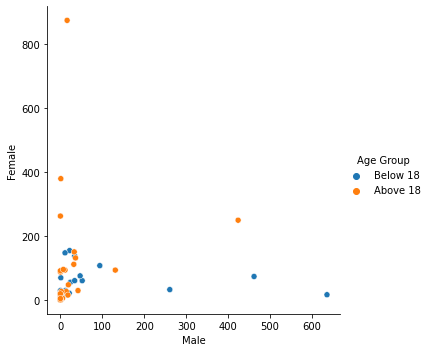

In [ ]:
sns.relplot(x="Male", y="Female", hue="Age Group", data=CleanVT)

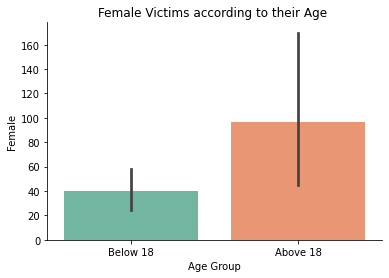

In [126]:
sns.set_palette('Set2')
sns.barplot(x='Age Group', y= 'Female', data= CleanVT)

plt.title("Female Victims according to their Age ")
sns.despine()

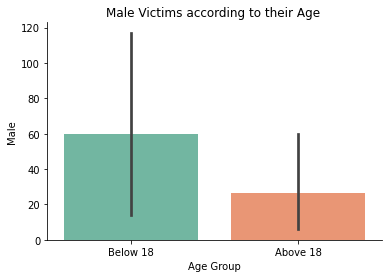

In [131]:
sns.set_palette('Set2')
sns.barplot(x='Age Group', y= 'Male', data= CleanVT)

plt.title("Male Victims according to their Age ")
sns.despine()

In [ ]:
#dataset for Purpose of trafficking

In [ ]:
data = '/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/2019_trafficking_purpose.xlsx'
TraffPurpose2019 = pd.read_excel(data)


In [ ]:
TraffPurpose2019.shape

(36, 13)

In [ ]:
TraffPurpose2019.columns

Index(['State/UT ', 'Forced Labour ', 'Sexual Exploitation for Prostitution ',
       'Domestic Servitude ', 'Forced Marriage ', 'Petty Crimes ',
       'Child Pornography ', 'Begging ', 'Drug Peddling ',
       'Removal of Organs ', 'Other reasons ', 'Total Persons ',
       'region type'],
      dtype='object')

In [ ]:
TraffPurpose2019.isnull().sum()

State/UT                                 0
Forced Labour                            0
Sexual Exploitation for Prostitution     0
Domestic Servitude                       0
Forced Marriage                          0
Petty Crimes                             0
Child Pornography                        0
Begging                                  0
Drug Peddling                            0
Removal of Organs                        0
Other reasons                            0
Total Persons                            0
region type                              0
dtype: int64

In [ ]:
#cleaning the data and dropping the columns that have 0 values

In [ ]:
df1 = TraffPurpose2019.drop(['State/UT ','Child Pornography ', 'Drug Peddling ', 'region type','Total Persons '], axis = 1)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Forced Labour                          36 non-null     int64
 1   Sexual Exploitation for Prostitution   36 non-null     int64
 2   Domestic Servitude                     36 non-null     int64
 3   Forced Marriage                        36 non-null     int64
 4   Petty Crimes                           36 non-null     int64
 5   Begging                                36 non-null     int64
 6   Removal of Organs                      36 non-null     int64
 7   Other reasons                          36 non-null     int64
dtypes: int64(8)
memory usage: 2.4 KB


In [ ]:
df1.describe()

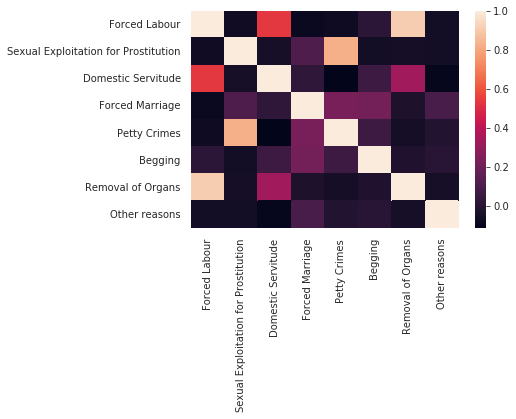

In [ ]:
df1.corr()
sns.heatmap(df1.corr());


In [ ]:
sns.set_style(style="darkgrid")

In [ ]:
#Top5= TraffPurpose2019.nlargest(5,'Total Persons ')

In [ ]:
#x= Top5['State/UT ']
#y= Top5['Total Persons ']


In [ ]:
#plt.bar(x,y)
#plt.xticks(rotation=90,fontsize=12)
#plt.title("Top 5 State with the most number of victims")
#plt.ylabel("Total Persons")
#plt.xlabel("State/UT")
#plt.show()

In [252]:
df3 = pd.read_csv (r'/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/Male_and_female_victims_of_trafficking_for_sexual_exploitation_over_time.csv')
print(df3)

    yearofregistration  Male  Female
0                 2002    80      91
1                 2003    94      81
2                 2004     3      59
3                 2005     0      52
4                 2006     1      46
5                 2007     2      52
6                 2008     3      52
7                 2009     4      43
8                 2010     0      37
9                 2011     2      36
10                2012     3      17
11                2013     5      27
12                2014     7      14
13                2015    10      72
14                2016     8      43
15                2017    20      71
16                2018    45      76
17                2019   100      51


1    2003-01-01
3    2005-01-01
5    2007-01-01
7    2009-01-01
9    2011-01-01
11   2013-01-01
13   2015-01-01
15   2017-01-01
17   2019-01-01
Name: yearofregistration, dtype: datetime64[ns]


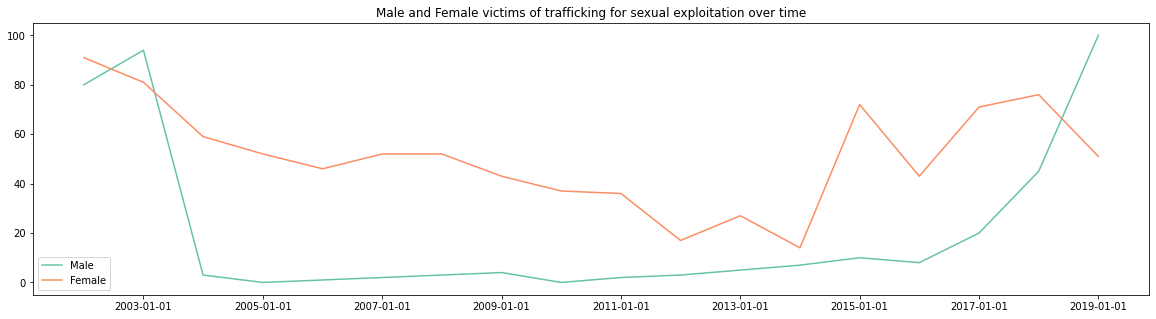

In [273]:
df3['yearofregistration']=pd.to_datetime(df3['yearofregistration'], format='%Y')
df3.yearofregistration=pd.to_datetime(df3.yearofregistration,format='%Y')
plt.figure(figsize=(20,5))
plt.title('Male and Female victims of trafficking for sexual exploitation over time')
plt.plot(df3.yearofregistration, df3.Male,label='Male')
plt.plot(df3.yearofregistration, df3.Female,label= 'Female')
print(df3.yearofregistration[1::2])
plt.xticks(df3.yearofregistration[1::2])





plt.legend()

In [275]:
df4 = pd.read_csv (r'/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/Male_and_female_victims_of_trafficking_for_labour_exploitation_who_are_children.csv')
print(df4)

    yearofregistration  Female  Male
0                 2002      10   100
1                 2003      27     0
2                 2004      33    80
3                 2005      67    99
4                 2006      54   100
5                 2007      51    82
6                 2008      39    93
7                 2009      57    61
8                 2010      59    65
9                 2011      37    54
10                2012      92    96
11                2013      44    61
12                2014      57    73
13                2015       8    46
14                2016       9    49
15                2017      10    52
16                2018      11    24
17                2019      29     0


1    2003-01-01
3    2005-01-01
5    2007-01-01
7    2009-01-01
9    2011-01-01
11   2013-01-01
13   2015-01-01
15   2017-01-01
17   2019-01-01
Name: yearofregistration, dtype: datetime64[ns]


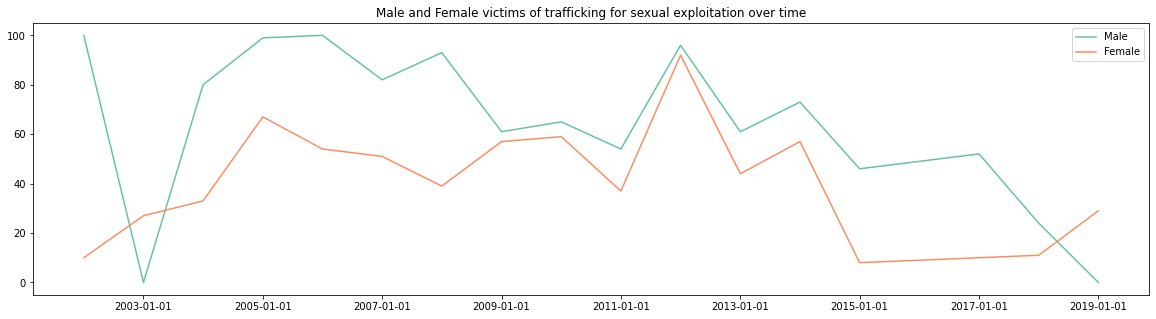

In [276]:
df4['yearofregistration']=pd.to_datetime(df3['yearofregistration'], format='%Y')
df4.yearofregistration=pd.to_datetime(df4.yearofregistration,format='%Y')
plt.figure(figsize=(20,5))
plt.title('Male and Female victims of trafficking for sexual exploitation over time')
plt.plot(df4.yearofregistration, df4.Male,label='Male')
plt.plot(df4.yearofregistration, df4.Female,label= 'Female')
print(df4.yearofregistration[1::2])
plt.xticks(df4.yearofregistration[1::2])





plt.legend()

In [308]:
df5 = pd.read_csv (r'/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/Means of control used on female victims.csv')
print(df5)


              Means of control  Female
0                 Debt bondage      18
1               Takes earnings      30
2   Restricts financial access       2
3                      Threats      38
4          Psychological abuse      44
5               Physical abuse      35
6                 Sexual abuse      19
7               False promises      31
8      Psychoactive substances      17
9           Restricts movement      44
10      Restricts medical care      13
11     Excessive working hours      22
12               Uses children       2
13   Threat of law enforcement       9
14       Withholds necessities      16
15         Withholds documents      23
16                 Other means      18


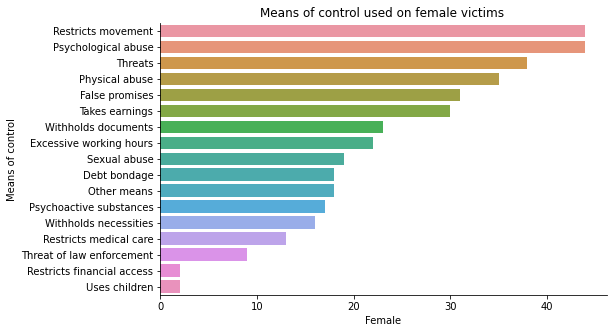

In [311]:
df5 = df5.sort_values(['Female'], ascending=False).reset_index(drop=True)
sns.set_palette('Set2')
sns.barplot(x='Female', y= 'Means of control', data= df5)

plt.title("Means of control used on female victims ")
sns.despine()

In [312]:
df6 = pd.read_csv (r'/content/ITBA-3205_ImpactClimateChange/Human Trafficking dataset/Means of control used on male victims.csv')
print(df6)


              Means of control  Male
0                 Debt bondage    27
1               Takes earnings    61
2   Restricts financial access     1
3                      Threats    50
4          Psychological abuse    56
5               Physical abuse    34
6                 Sexual abuse     5
7               False promises    62
8      Psychoactive substances     5
9           Restricts movement    51
10      Restricts medical care    30
11     Excessive working hours    54
12               Uses children     0
13   Threat of law enforcement    24
14       Withholds necessities    32
15         Withholds documents    44
16                 Other means    11


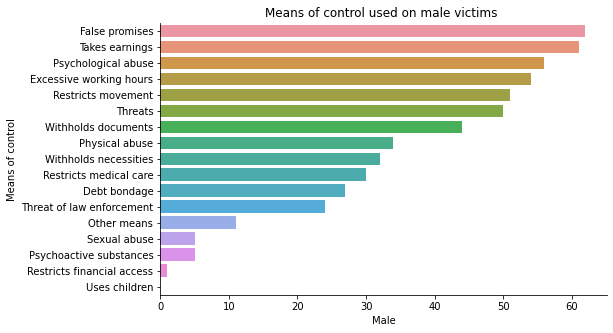

In [313]:
df6= df6.sort_values(['Male'], ascending=False).reset_index(drop=True)
sns.set_palette('Set2')
sns.barplot(x='Male', y= 'Means of control', data= df6)

plt.title("Means of control used on male victims ")
sns.despine()